# Step 1 | Importing Libraries

In [1]:
#importing dataset
import pandas as pd

#math
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 

#regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#metrics
from sklearn import metrics

#crossval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#dimention increasing
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Step 2 | Reading Dataset

In [3]:
data = pd.read_csv("insurance.csv")
df = pd.DataFrame(data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Our target is charges and we are trying to predict insurance cost.

# 

# Step 3 | Information

### Info

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Describing

In [41]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Shape of dataset

In [43]:
df.shape

(1338, 7)

### Duplicated samples

In [44]:
df.duplicated().sum()

1

In [45]:
df_dup = df[df.duplicated()]
df_dup

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [4]:
df.drop(index=[581], inplace=True)

### Missing values

In [163]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Some info :
1. There are 1338 samples with 7 columns(features).

2. As we can see, there are no missing values in our dataset.

3. But there is a duplicated sample, so we are going to delet it. (Now we have 1337 samples).

4. Also, we don't have missing values.


# 

# Step 4 | Preprocessing

### Outlier Detection

In [190]:
features = ['age', 'bmi', 'children', 'charges']

## Using Standard Deviation

In [191]:
index_list = []

for f in features :
    mean = df[f].mean()
    std = df[f].std()
    cutoff = std*3
    
    index = df[(df[f] < mean-cutoff) | (df[f] > mean+cutoff)].index
    index_list.extend(index)

In [192]:
index_list = sorted(set(index_list))
print("number of outliers (using Standard Deviation) is : ", len(index_list))
print("outlier indexes (using Standard Deviation) is : ", index_list)

number of outliers (using Standard Deviation) is :  29
outlier indexes (using Standard Deviation) is :  [32, 34, 71, 116, 166, 413, 425, 438, 543, 568, 577, 640, 819, 847, 877, 932, 937, 969, 984, 1047, 1085, 1116, 1130, 1146, 1230, 1245, 1272, 1300, 1317]


## Using Interquartile Range

In [193]:
index_list = []

for f in features :
    Q1 = np.percentile(df[f], 25)
    Q3 = np.percentile(df[f], 75)
    
    IQR = Q3 - Q1
    
    index = df[(df[f] < Q1-1.5*IQR) | (df[f] > Q3+1.5*IQR)].index
    index_list.extend(index)

In [194]:
index_list = sorted(set(index_list))
print("number of outliers (using Interquartile Range) is : ", len(index_list))
print("outlier indexes (using Interquartile Range) is : ", index_list)

number of outliers (using Interquartile Range) is :  145
outlier indexes (using Interquartile Range) is :  [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 116, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 286, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 401, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 847, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1088, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1317, 1323]


## Using scatter and boxplot

In [19]:
numerical_features = ['age', 'bmi', 'charges']

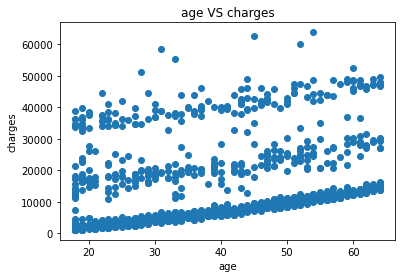

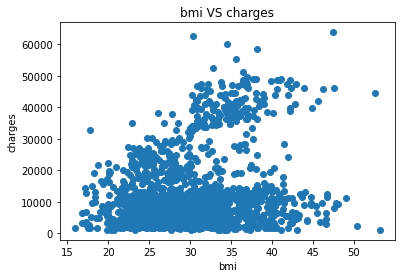

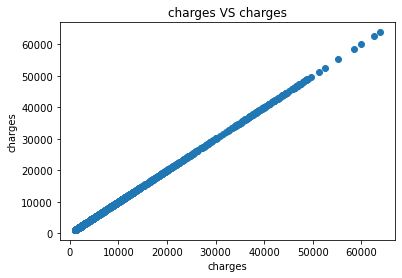

In [20]:
# numericals
for n in numerical_features :
    plt.scatter(df[n], df["charges"])
    plt.title(f"{n} VS charges")
    plt.xlabel(f"{n}")
    plt.ylabel("charges")
    plt.show()

In [21]:
categorical_features = ["sex", "children", "smoker", "region"]

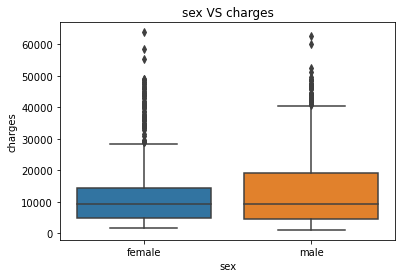

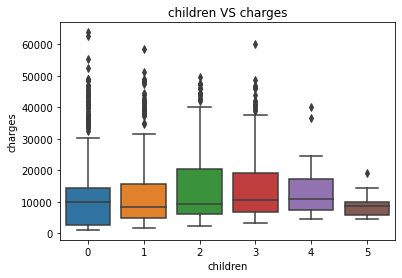

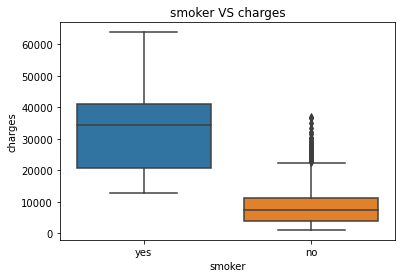

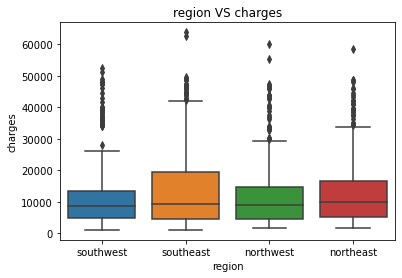

In [22]:
#categoricals
for n in categorical_features :
    sns.boxplot(df[n], df["charges"])
    plt.title(f"{n} VS charges")
    plt.show()

## There are some outliers in our dataset. But it doesn't mean that they are false values or I should remove them. Also the number of samples are low.


#### Note : removing outliers didnot increase the accuaracy of our model .

# 

# Step 5 | Visualizations

### First let's have a quik overview using pairplot.

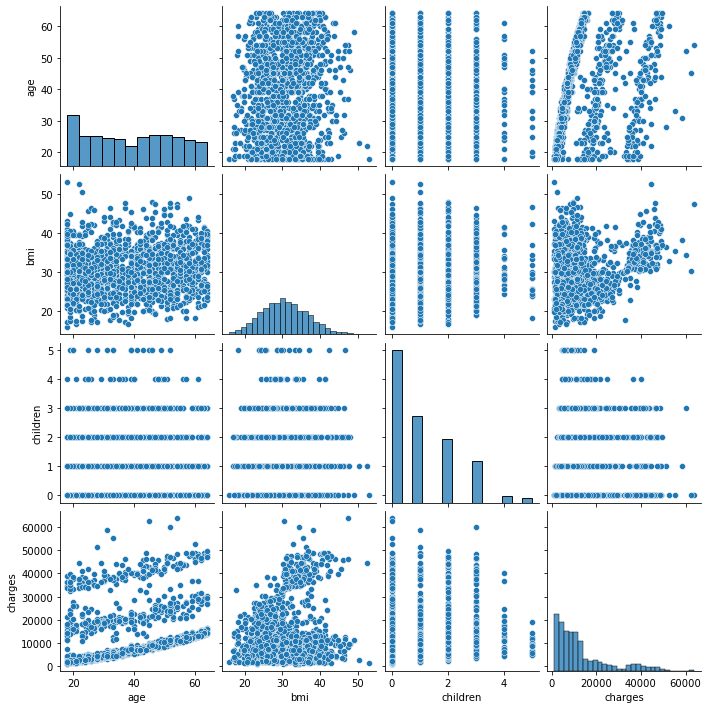

In [23]:
sns.pairplot(df)

## Numerical features

## checking features distribution 

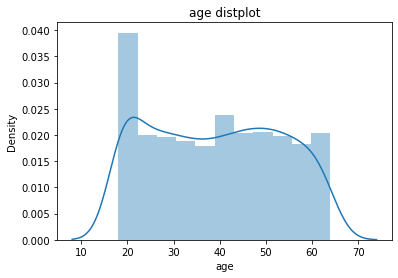

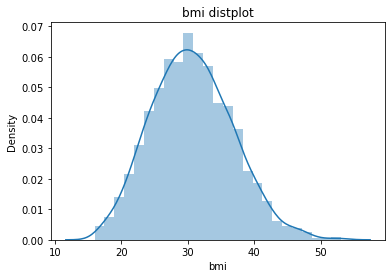

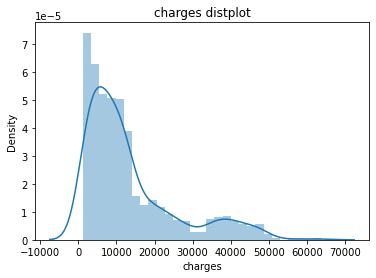

In [24]:
for nf in numerical_features :
    sns.distplot(df[nf])
    plt.title(f"{nf} distplot")
    plt.show()

## Notes :
    1. Column 'age' has different range of ages and most of them are around 20.
    2. Column 'charges' is right skewed. 

# 

## Categorical Features

In [25]:
categorical_features = ['sex','children', 'smoker', 'region']

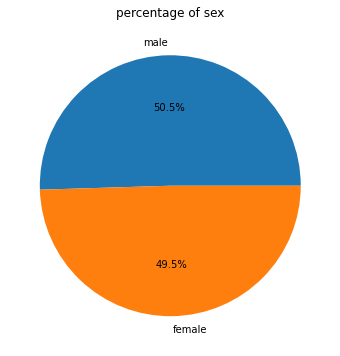

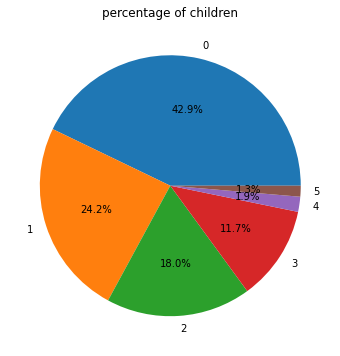

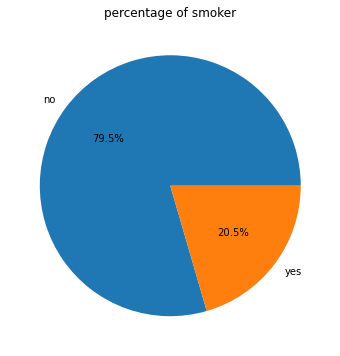

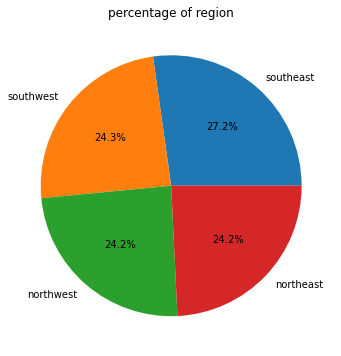

In [26]:
for c in categorical_features :
    s = df[c].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'percentage of {c}')
    plt.show()

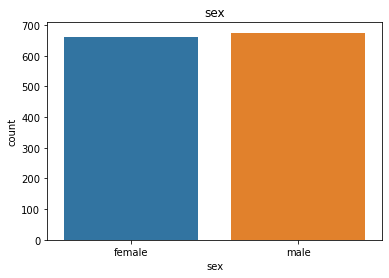

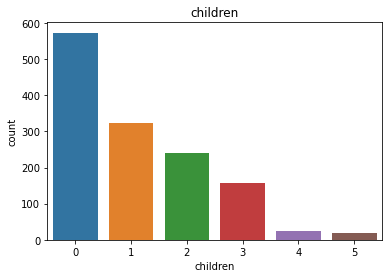

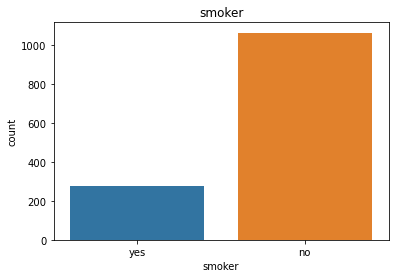

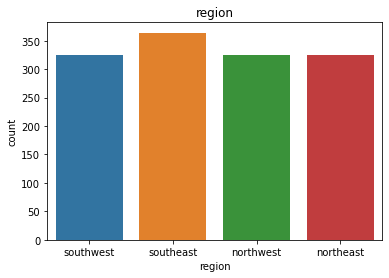

In [27]:
for c in categorical_features :
    sns.countplot(data=df, x = df[c])
    plt.title(f"{c}")
    plt.show()

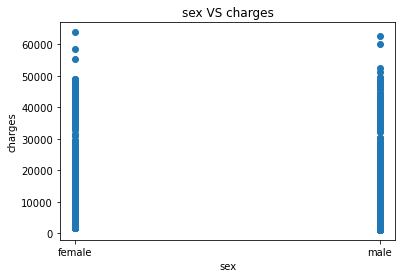

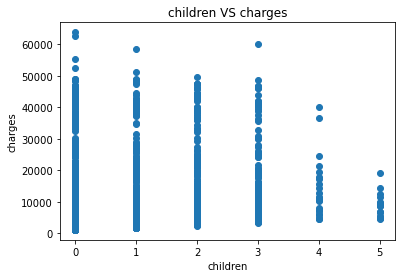

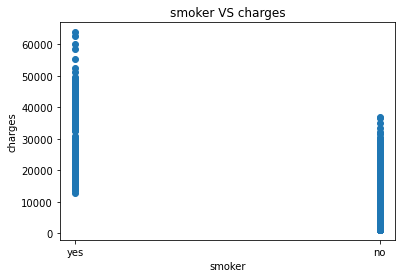

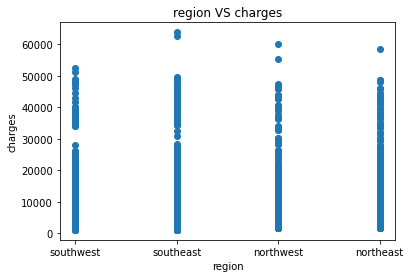

In [28]:
for c in categorical_features :
    plt.scatter(df[c], df["charges"])
    plt.title(f"{c} VS charges")
    plt.xlabel(f"{c}")
    plt.ylabel("charges")
    plt.show()

## Notes :
    1. In column 'sex', the number of male clients are more than female clients. (0.5% more)
    2. In column 'children', most people do not have child and only 1.3% of all have 5 children. The charges which families 
       with  5 children got is less than 30000.
    3. In column 'smoker', most clients are not smokers and only 20.5%(less than 300) of all are.
    4. In column 'region', northwest and northeast has the same percentage and southeast has the highest(27.2%).

# 

# Step 6 |  Categorical Features Encoding

### We should covert Categorical Features to numbers, because ML Models cannot work with categorical features.
    1. Label Encoding : converting categorical features into numerical features.
    2. One hot encoding : convert each categorical value into new categorical column and assign a binary value of 0 to 1 to them
    3. Dummy variable trap : occurs when 2 or more dummy variables created by one hit encoding are highly correlated(multicolinear).

In [5]:
categoricals = ['sex', 'smoker', 'region']

In [6]:
df1 = pd.get_dummies(df, columns=categoricals, drop_first=True)
df1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [7]:
df1.duplicated().sum()

0

# Step 7 | Correlation

<AxesSubplot:>

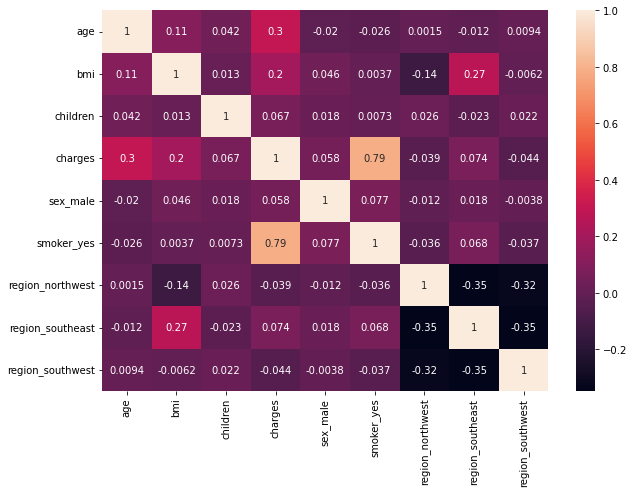

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True)

### Notes :
    1. regions are  correlated with each other, so we have Multicollinearity.
    2. charges is highly correlated with smoker_yes.

# step 8 | LinearRegression

### Selecting X and Y

In [113]:
x = pd.DataFrame(df1, columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])

y = df1["charges"]

### train test split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

### Scaling 

In [115]:
scaler = StandardScaler()
scaler.fit(x_train)  
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

### LinearRegression Model

In [116]:
reg = LinearRegression()
reg.fit(scaled_x_train, y_train)

LinearRegression()

### intercept and coef

In [117]:
linear_intercept = reg.intercept_
linear_coef = reg.coef_

In [118]:
for f,c in zip(x_train, linear_coef):
    print("coef of column ", f, " is : ", c)

coef of column  age  is :  3408.7248380484602
coef of column  bmi  is :  1807.9164317498144
coef of column  children  is :  575.5610514108258
coef of column  sex_male  is :  -41.4709516100998
coef of column  smoker_yes  is :  9466.141539431695
coef of column  region_northwest  is :  -242.0680351293697
coef of column  region_southeast  is :  -360.1155744523403
coef of column  region_southwest  is :  -548.3351596573626


### predicting

In [119]:
y_pred = reg.predict(scaled_x_test)

In [120]:
linear_score = metrics.r2_score(y_test, y_pred)

### metrics

In [219]:
def Evaluation(x_test, y_test, model) :
    y_pred = model.predict(x_test)    
    mse = metrics.mean_absolute_error(y_test, y_pred)
    msqe = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2_score)

In [108]:
Evaluation(scaled_x_test, y_test, reg)

mean_absolute_error :  4240.869937991887
mean_squared_error  :  38832590.88652548
root_mean_absolute_error 6231.580127586059
R2_score            :  0.762868241776973


In [110]:
def compare(y_test, y_pred):
    compare = pd.DataFrame()
    compare["Actual"] = y_test
    compare["Predict"] = y_pred
    compare["compare"] = abs(y_test-y_pred)
    return compare

In [111]:
compare(y_test,y_pred)

,Actual,Predict,compare
1248,1633.96180,5166.958334,3532.996534
610,8547.69130,9601.121191,1053.429891
393,9290.13950,11400.879099,2110.739599
503,32548.34050,26117.898110,6430.442390
198,9644.25250,7001.185205,2643.067295
...,...,...,...
1320,5425.02335,7318.981256,1893.957906
97,10226.28420,13622.701899,3396.417699
786,12741.16745,15258.212374,2517.044924
1181,2850.68375,3946.527741,1095.843991


Text(0, 0.5, 'y_pred')

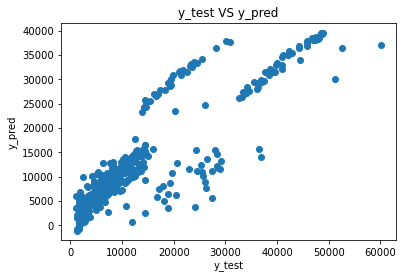

In [27]:
plt.scatter(y_test, y_pred)
plt.title("y_test VS y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

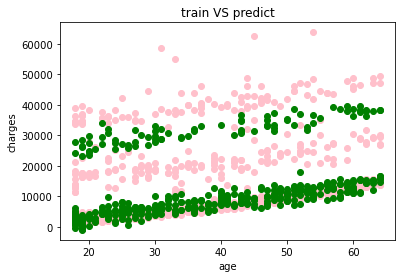

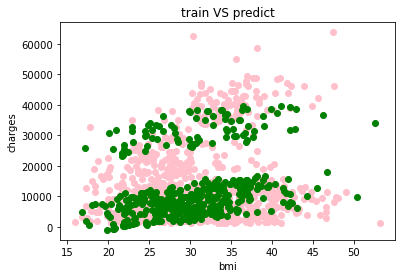

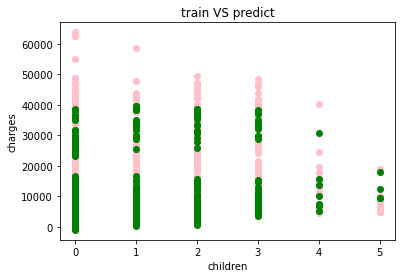

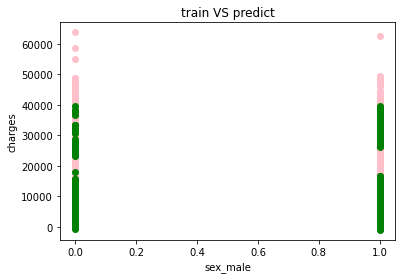

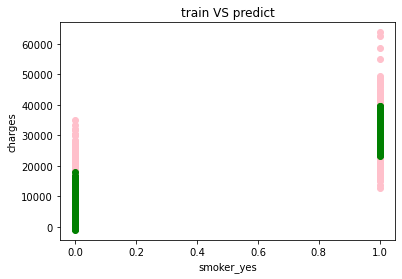

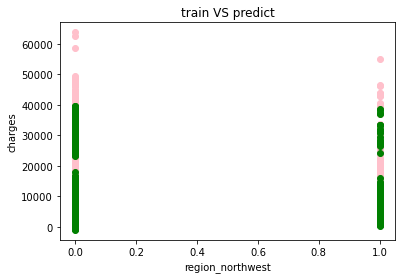

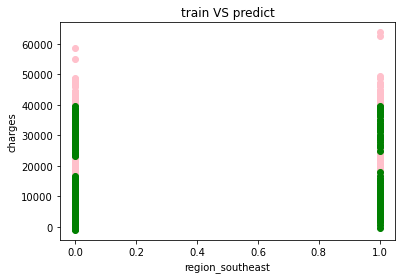

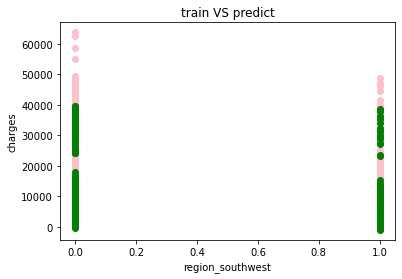

In [28]:
for i in x_train.columns:
    plt.scatter(x_train[i], y_train, color="pink")
    plt.scatter(x_test[i], y_pred, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

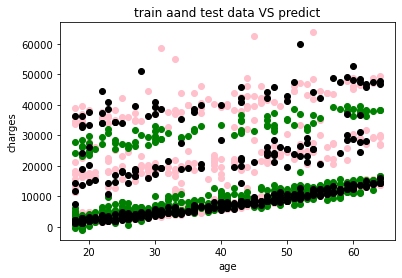

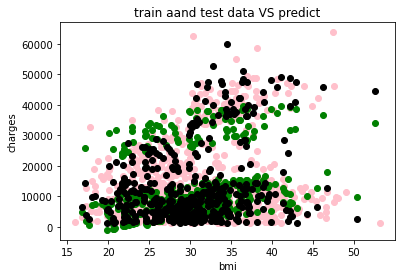

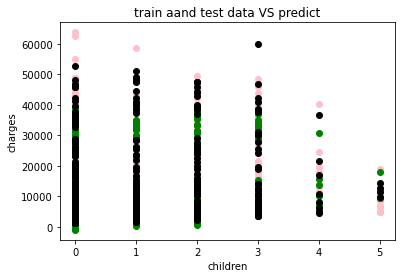

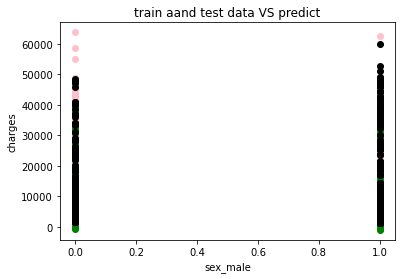

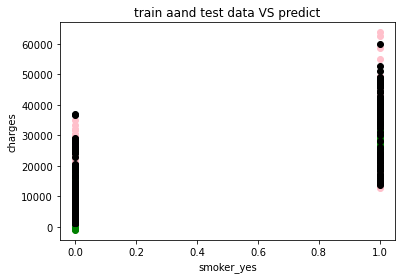

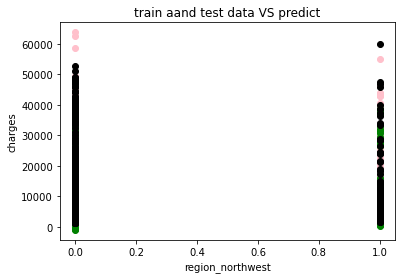

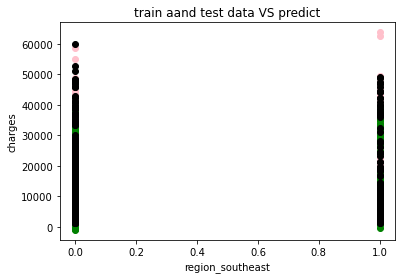

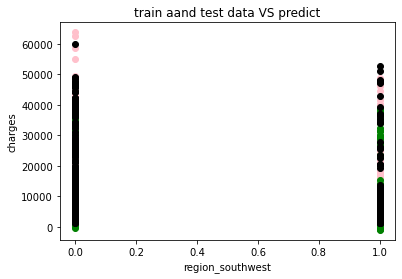

In [24]:
for i in x_train.columns:
    plt.scatter(x_train[i], y_train, color="pink")
    plt.scatter(x_test[i], y_pred, color="green")
    plt.scatter(x_test[i], y_test, color="black")
    plt.title("train aand test data VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

### Cross validation

In [25]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(reg, x, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.7206317  0.76492971 0.75759092]
mean of all scores is :  0.7477174414523491


In [30]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(reg, scaled_x_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.72884964 0.74391693 0.74447377]
mean of all scores is :  0.7390801096397173


# Step 9 | Polynomial Regression

In [121]:
x = pd.DataFrame(df1, columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])
x.reset_index(drop=True, inplace=True)

In [122]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)        # array
x_poly = pd.DataFrame(x_poly, columns=poly_features.get_feature_names_out(x.columns))   # dataFrame
x_poly

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age^2,age bmi,...,smoker_yes^2,smoker_yes region_northwest,smoker_yes region_southeast,smoker_yes region_southwest,region_northwest^2,region_northwest region_southeast,region_northwest region_southwest,region_southeast^2,region_southeast region_southwest,region_southwest^2
0,19.0,27.900,0.0,0.0,1.0,0.0,0.0,1.0,361.0,530.100,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1.0,0.0,0.0,1.0,0.0,324.0,607.860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,33.000,3.0,1.0,0.0,0.0,1.0,0.0,784.0,924.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33.0,22.705,0.0,1.0,0.0,1.0,0.0,0.0,1089.0,749.265,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,32.0,28.880,0.0,1.0,0.0,1.0,0.0,0.0,1024.0,924.160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50.0,30.970,3.0,1.0,0.0,1.0,0.0,0.0,2500.0,1548.500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1333,18.0,31.920,0.0,0.0,0.0,0.0,0.0,0.0,324.0,574.560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,18.0,36.850,0.0,0.0,0.0,0.0,1.0,0.0,324.0,663.300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,21.0,25.800,0.0,0.0,0.0,0.0,0.0,1.0,441.0,541.800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Now there are 44 columns.

In [123]:
x_poly.duplicated().sum()

2

In [124]:
x.duplicated().sum()

2

In df1, there are no duplicated samples but because x and x_poly doen't have column "y", they both have 2 similar duplicated samples.

# 

### train and test split

In [125]:
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly, y, test_size=0.3, random_state=0)

### Scaling

In [126]:
scaler = StandardScaler()
scaler.fit(x_poly_train)  # fit on training data

StandardScaler()

In [127]:
x_poly_scaled_train = scaler.transform(x_poly_train)  # array
x_poly_scaled_train = pd.DataFrame(x_poly_train, columns=poly_features.get_feature_names_out(x.columns)) # DataFrame

x_poly_scaled_test = scaler.transform(x_poly_test)   # array
x_poly_scaled_test = pd.DataFrame(x_poly_test, columns=poly_features.get_feature_names_out(x.columns))   # DataFrame

### Poly LinearRegression

In [128]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly_scaled_train, y_poly_train)

LinearRegression()

### predict

In [129]:
y_poly_pred = poly_reg.predict(x_poly_scaled_test)

### metrics

In [130]:
#Evaliuation on test dataset

Evaluation(x_poly_test, y_poly_test, poly_reg)

mean_absolute_error :  2979.233586638194
mean_squared_error  :  24518311.809723556
root_mean_absolute_error 4951.596894914161
R2_score            :  0.8502785867394292


In [131]:
#Evaluation on train dataset

Evaluation(x_poly_train, y_poly_train, poly_reg)

mean_absolute_error :  2729.8417162153346
mean_squared_error  :  21752781.0832046
root_mean_absolute_error 4663.987680430192
R2_score            :  0.8435014380368242


In [132]:
poly_score = metrics.r2_score(y_poly_test, y_poly_pred)
poly_score

0.8502785867394292

In [35]:
linear_score

0.762868241776973

#### Score of LinearRegression is 76.2% and the score of PolyLinearRegression is 85%. So far, PolyLinearRegression has the higher score.

# 

### Finding useful features 

In [133]:
# Here I am trying to creat x with useful columns

def useful_poly_columns(given_score):
    score = given_score
    
    for col in x_poly.columns:
    
        name_of_column = str(col)                            # creating name for the new column in x
        
        if col not in x:
            x.insert(0, name_of_column, x_poly[col])         # adding the new column into x 
            
            x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.3)  # creating new params with new datas in dataFrame x
            
            reg_model = LinearRegression()                   # creating a new model
            reg_model.fit(x_train, y_train)                  # fittng the model on new data
            
            y_pred = reg_model.predict(x_test)
            new_score = metrics.r2_score(y_test, y_pred)
    
            if new_score < score :
                x.drop(col,axis=1, inplace=True)
            else :
                score = new_score
        
    print(score)
        
    return x

In [134]:
useful_poly_columns(linear_score)

0.8503235001912217


,region_southwest^2,region_northwest^2,smoker_yes region_southwest,smoker_yes region_southeast,smoker_yes^2,children region_southwest,children region_northwest,children smoker_yes,bmi region_southeast,bmi region_northwest,...,age bmi,age^2,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.00,0.000,...,530.100,361.0,19,27.900,0,0,1,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.77,0.000,...,607.860,324.0,18,33.770,1,1,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.00,0.000,...,924.000,784.0,28,33.000,3,1,0,0,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,22.705,...,749.265,1089.0,33,22.705,0,1,0,1,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,28.880,...,924.160,1024.0,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,30.970,...,1548.500,2500.0,50,30.970,3,1,0,1,0,0
1333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,...,574.560,324.0,18,31.920,0,0,0,0,0,0
1334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.85,0.000,...,663.300,324.0,18,36.850,0,0,0,0,1,0
1335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,...,541.800,441.0,21,25.800,0,0,0,0,0,1


#### x_poly has 44 columns. Using useful_poly_columns function, the nimber of columns decreased to 25. Now there are less columns and the accuracy of the model increased a little too.

### Building new model using new x

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.3) 

In [136]:
poly_regression2 = LinearRegression()
poly_regression2.fit(x_train, y_train)

LinearRegression()

In [137]:
Evaluation(x_train, y_train, poly_regression2)

mean_absolute_error :  2732.6917164304846
mean_squared_error  :  22033941.6726618
root_mean_absolute_error 4694.032559821225
R2_score            :  0.8414786517198716


In [138]:
Evaluation(x_test, y_test, poly_regression2)

mean_absolute_error :  2955.330180835602
mean_squared_error  :  24510956.80290444
root_mean_absolute_error 4950.85414882164
R2_score            :  0.8503235001912217


#### New polyRegressin Model has 84.11% accuracy on traing data and 85.03% on test data.

# 

### CrossValidation

In [65]:
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(poly_regression2, x, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.83634046 0.87292444 0.86610154 0.84810283 0.88591321 0.79384704
 0.73723512 0.83769057 0.840217   0.8292248 ]
mean of all scores is :  0.8347597019529964


In [52]:
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(poly_regression2, x_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.81113004 0.86304997 0.74415626 0.87296371 0.89661261 0.86570147
 0.7524121  0.85647227 0.79534363 0.83087013]
mean of all scores is :  0.828871218306897


### Prediction

In [139]:
y_pred_poly_regression = poly_regression2.predict(x_test)

In [140]:
poly_score = metrics.r2_score(y_test, y_pred_poly_regression)
poly_score

0.8503235001912217

### Comparing

In [55]:
compare(y_test, y_pred_poly_regression)

,Actual,Predict,compare
1248,1633.96180,1935.551268,301.589468
610,8547.69130,10256.145755,1708.454455
393,9290.13950,11089.541201,1799.401701
503,32548.34050,25550.286845,6998.053655
198,9644.25250,9927.417177,283.164677
...,...,...,...
1320,5425.02335,8126.113361,2701.090011
97,10226.28420,11222.586274,996.302074
786,12741.16745,14366.920528,1625.753078
1181,2850.68375,3848.485997,997.802247


Text(0.5, 0, 'y_test')

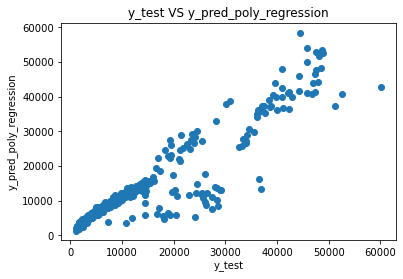

In [56]:
plt.scatter(y_test, y_pred_poly_regression)
plt.title("y_test VS y_pred_poly_regression")
plt.ylabel("y_pred_poly_regression")
plt.xlabel("y_test")

# 

# Step 10 | Ridge Regression

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization.

Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

### train test split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

### scaling

In [142]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Ridge Resression Model

In [143]:
alpha = 10**np.linspace(10,-2,100)*0.5       # alpha is non-negative  : [0, int]

In [144]:
ridge_cv = RidgeCV(alphas=alpha, scoring="neg_mean_squared_error", cv=10)
ridge_cv.fit(x_train_scaled, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [145]:
print( "alpha value : ", ridge_cv.alpha_)     

alpha value :  0.7599555414764666


In [146]:
ridge_coef = ridge_cv.coef_
ridge_coef

array([-2.77805862e+02, -9.69227614e+01,  8.81014288e+01,  1.30245512e+01,
       -4.37711696e+03, -2.40985434e+02,  2.75534953e+02, -5.98072741e+01,
       -1.99548700e+03, -2.48807723e+02,  1.83954856e+04,  4.16359601e+02,
       -8.21986276e+00,  2.47430365e+02, -3.07886894e+02,  1.57048363e+01,
        2.92785285e+03,  5.66481191e+02,  2.97950637e+02,  1.06864184e+03,
       -1.17407929e+02, -4.37711696e+03, -9.69227614e+01,  1.03215865e+03,
       -2.77805862e+02])

### Evaluation

In [147]:
Evaluation(x_train_scaled, y_train, ridge_cv)

mean_absolute_error :  2735.02852125511
mean_squared_error  :  22044695.319394402
root_mean_absolute_error 4695.177879419948
R2_score            :  0.8414012855089456


In [148]:
Evaluation(x_test_scaled, y_test, ridge_cv)

mean_absolute_error :  2949.733627433972
mean_squared_error  :  24469331.31838882
root_mean_absolute_error 4946.6484935144545
R2_score            :  0.8505776867933704


#### The accuracy of polynomial regression and Ridge resgression are almost the same.

### Predict

In [149]:
y_pred_ridge = ridge_cv.predict(x_test_scaled)

In [150]:
ridge_score = metrics.r2_score(y_test, y_pred_ridge)
ridge_score

0.8505776867933704

### Comparing

In [67]:
compare(y_test, y_pred_ridge)

,Actual,Predict,compare
1248,1633.96180,2007.108393,373.146593
610,8547.69130,10196.832628,1649.141328
393,9290.13950,11110.097357,1819.957857
503,32548.34050,25666.135105,6882.205395
198,9644.25250,9864.962475,220.709975
...,...,...,...
1320,5425.02335,8114.883895,2689.860545
97,10226.28420,11280.146017,1053.861817
786,12741.16745,14384.587356,1643.419906
1181,2850.68375,3853.427985,1002.744235


Text(0.5, 0, 'y_test')

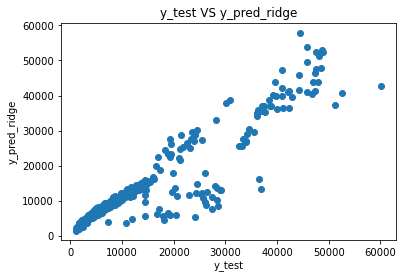

In [68]:
plt.scatter(y_test, y_pred_ridge)
plt.title("y_test VS y_pred_ridge")
plt.ylabel("y_pred_ridge")
plt.xlabel("y_test")

# 

# Step 11 | LassoRegression

Lasso Regression can exclude useless variables from equation, and that is the difference between lasso and ridge regression.

Linear Model trained with L1 prior as regularizer

### train test split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

### Scaling

In [152]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Lasso Model

In [153]:
lasso_cv = LassoCV(n_alphas=100, max_iter=1000, cv=10)
lasso_cv.fit(x_train_scaled, y_train)

LassoCV(cv=10)

In [154]:
lasso_cv.alpha_

20.021343793274767

### coef

In [155]:
ridge_coef = ridge_cv.coef_
ridge_coef

array([-2.77805862e+02, -9.69227614e+01,  8.81014288e+01,  1.30245512e+01,
       -4.37711696e+03, -2.40985434e+02,  2.75534953e+02, -5.98072741e+01,
       -1.99548700e+03, -2.48807723e+02,  1.83954856e+04,  4.16359601e+02,
       -8.21986276e+00,  2.47430365e+02, -3.07886894e+02,  1.57048363e+01,
        2.92785285e+03,  5.66481191e+02,  2.97950637e+02,  1.06864184e+03,
       -1.17407929e+02, -4.37711696e+03, -9.69227614e+01,  1.03215865e+03,
       -2.77805862e+02])

### Evaluation

In [156]:
Evaluation(x_test_scaled, y_test, lasso_cv)

mean_absolute_error :  2945.8332630848613
mean_squared_error  :  24504636.041783728
root_mean_absolute_error 4950.215757094203
R2_score            :  0.8503620980072223


In [157]:
Evaluation(x_train_scaled, y_train, lasso_cv)

mean_absolute_error :  2746.3694081825674
mean_squared_error  :  22146436.054976363
root_mean_absolute_error 4706.000005841092
R2_score            :  0.8406693203063929


### Predict

In [158]:
y_pred_lasso = lasso_cv.predict(x_test_scaled)

In [159]:
lasso_score = metrics.r2_score(y_test, y_pred_lasso)
lasso_score

0.8503620980072223

### Compare

In [78]:
compare(y_test, y_pred_lasso)

,Actual,Predict,compare
1248,1633.96180,2377.539316,743.577516
610,8547.69130,9920.761814,1373.070514
393,9290.13950,11020.476148,1730.336648
503,32548.34050,25983.664367,6564.676133
198,9644.25250,9934.636675,290.384175
...,...,...,...
1320,5425.02335,7787.775162,2362.751812
97,10226.28420,11504.487460,1278.203260
786,12741.16745,14157.941753,1416.774303
1181,2850.68375,3968.778350,1118.094600


Text(0.5, 0, 'y_test')

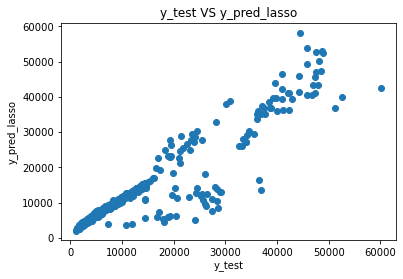

In [79]:
plt.scatter(y_test, y_pred_lasso)
plt.title("y_test VS y_pred_lasso")
plt.ylabel("y_pred_lasso")
plt.xlabel("y_test")

# 

# Step 12 | ElasticNet

Linear regression with combined L1 and L2 priors as regularizer.

The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

### train test split

In [160]:
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x, y, test_size=0.3, random_state=0)

### scaling

In [161]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### ElasticNet Model

In [162]:
elasticnet_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.01, n_alphas=100, max_iter=1000)
elasticnet_cv.fit(x_train_scaled, y_train)

ElasticNetCV(eps=0.01, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

Elastic net model with best model selection by cross-validation.

### coef and alpha and l1_ratio_

In [163]:
elastic_coef = elasticnet_cv.coef_
elastic_coef

array([-2.29025424e+02, -0.00000000e+00, -0.00000000e+00,  5.72157247e+01,
       -2.97188871e+01, -1.37567872e+02,  2.16682805e+01, -0.00000000e+00,
       -1.50986391e+02, -0.00000000e+00,  1.36615958e+04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.19027351e+01,  8.48850952e+02,
        2.70672039e+03,  5.31966427e+01,  0.00000000e+00,  6.79226134e+02,
       -1.12520421e+01, -3.78145938e+03, -0.00000000e+00, -0.00000000e+00,
       -9.37144256e+00])

In [164]:
elasticnet_cv.alpha_

99.64669984872297

In [165]:
elasticnet_cv.l1_ratio_

1.0

### Evaluation

In [166]:
Evaluation(x_test_scaled, y_test, elasticnet_cv)

mean_absolute_error :  3025.8172314122703
mean_squared_error  :  25490648.587356202
root_mean_absolute_error 5048.826456450667
R2_score            :  0.8443409986362118


In [167]:
Evaluation(x_train_scaled, y_train, elasticnet_cv)

mean_absolute_error :  2859.7852374149957
mean_squared_error  :  23326464.2363631
root_mean_absolute_error 4829.74784397313
R2_score            :  0.8321797063689073


### Predict

In [170]:
y_pred_elastic = elasticnet_cv.predict(x_test_scaled)

In [171]:
elastic_score = metrics.r2_score(y_test, y_pred_elastic)
elastic_score

0.8443409986362118

### Compare

In [90]:
compare(y_test, y_pred_elastic)

,Actual,Predict,compare
1248,1633.96180,3215.124975,1581.163175
610,8547.69130,9608.410774,1060.719474
393,9290.13950,10598.517064,1308.377564
503,32548.34050,26892.997972,5655.342528
198,9644.25250,9544.953828,99.298672
...,...,...,...
1320,5425.02335,7347.437149,1922.413799
97,10226.28420,12097.675653,1871.391453
786,12741.16745,14060.245782,1319.078332
1181,2850.68375,4240.391577,1389.707827


Text(0.5, 0, 'y_test')

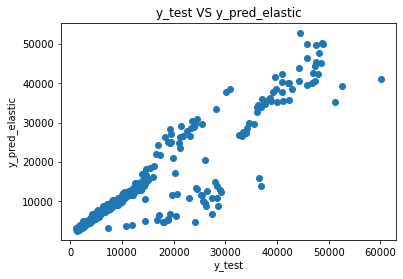

In [91]:
plt.scatter(y_test, y_pred_elastic)
plt.title("y_test VS y_pred_elastic")
plt.ylabel("y_pred_elastic")
plt.xlabel("y_test")

# 

# Step 13 | DecisionTreeRegressor

A Decision Tree algorithm is one of the most popular machine learning algorithms. It is a supervised learning algorithm which can be used for both Calssification and Regression datasets. Decision tree includes 3 parts such as a root node, branches, and leaf nodes. Also there could be internal node which are attributes.

## 13.1 | First let's build a model using the x DataFrame with 25 columns(outliers are included)

In [172]:
x

,region_southwest^2,region_northwest^2,smoker_yes region_southwest,smoker_yes region_southeast,smoker_yes^2,children region_southwest,children region_northwest,children smoker_yes,bmi region_southeast,bmi region_northwest,...,age bmi,age^2,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.00,0.000,...,530.100,361.0,19,27.900,0,0,1,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.77,0.000,...,607.860,324.0,18,33.770,1,1,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.00,0.000,...,924.000,784.0,28,33.000,3,1,0,0,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,22.705,...,749.265,1089.0,33,22.705,0,1,0,1,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,28.880,...,924.160,1024.0,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,30.970,...,1548.500,2500.0,50,30.970,3,1,0,1,0,0
1333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,...,574.560,324.0,18,31.920,0,0,0,0,0,0
1334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.85,0.000,...,663.300,324.0,18,36.850,0,0,0,0,1,0
1335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,...,541.800,441.0,21,25.800,0,0,0,0,0,1


### train test split

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Building a Model

In [174]:
DTs_reg = DecisionTreeRegressor()
DTs_reg.fit(x_train, y_train)

DecisionTreeRegressor()

### Evaluation

In [175]:
Evaluation(x_train, y_train, DTs_reg)

mean_absolute_error :  33.8423437433155
mean_squared_error  :  279504.08897230285
root_mean_absolute_error 528.6814626713357
R2_score            :  0.9979891312370736


In [176]:
Evaluation(x_test, y_test, DTs_reg)

mean_absolute_error :  3470.872343529851
mean_squared_error  :  51753220.46114983
root_mean_absolute_error 7193.971119009989
R2_score            :  0.6839682369502991


### CrossValidation

In [177]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(DTs_reg, x, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.69533536 0.70774939 0.66188756 0.42729941 0.71860462 0.8236228
 0.77731895 0.64805979 0.68329965 0.81766699]
mean of all scores is :  0.6960844526659173


###### The model is working very good on training data and not too good on test data. 

# 

### Improving the Model

In [234]:
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter = ["best", "random"]
max_depth = range(3,21)
random_state =range(1,8)

params = {"splitter":splitter, "max_depth":max_depth, "random_state":random_state}

DTs_grid = GridSearchCV(DTs_reg, param_grid=params,
                         scoring = "neg_mean_squared_error",
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)

DTs_grid.fit(x_train_scaled, y_train)


print('best parameters:',DTs_grid.best_params_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
best parameters: {'max_depth': 3, 'random_state': 7, 'splitter': 'best'}


### Building a new model

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [210]:
DTs_reg = DecisionTreeRegressor(max_depth= 3, random_state= 7, splitter= 'best', criterion="squared_error")
DTs_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=7)

### New Evaluation

In [211]:
evaliuation(x_train, y_train, DTs_reg)

mean_absolute_error :  2883.8596683867754
mean_squared_error  :  20779479.499455728
root_mean_absolute_error 4558.451436557784
R2_score            :  0.8505037747785288


In [212]:
evaliuation(x_test, y_test, DTs_reg)

mean_absolute_error :  3307.055716674286
mean_squared_error  :  26453459.982938368
root_mean_absolute_error 5143.292717990915
R2_score            :  0.8384615774114286


### Predict

In [213]:
y_pred_DTs = DTs_reg.predict(x_test)

In [214]:
DTs_score = metrics.r2_score(y_test, y_pred_DTs)
DTs_score

0.8384615774114286

### Compare

Text(0.5, 0, 'y_test')

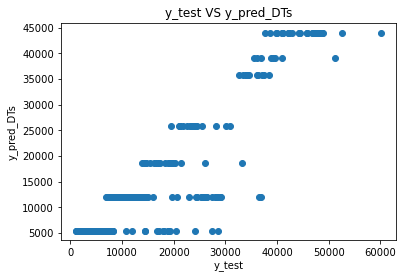

In [233]:
plt.scatter(y_test, y_pred_DTs)
plt.title("y_test VS y_pred_DTs")
plt.ylabel("y_pred_DTs")
plt.xlabel("y_test")

###### After hyperparamet tuning, the accuracy of the DT model increased to 83.8% on test data.

# 

## 13.2 | Now let's build another model with the original x.

In [215]:
df_without_outliers = df1.copy()
df_without_outliers.drop(index=index_list, inplace=True)

x_without_outliers = pd.DataFrame(df_without_outliers, columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])
y_without_outliers = df_without_outliers["charges"]

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x_without_outliers, y_without_outliers, test_size=0.3, random_state=0)

In [217]:
DTs_reg_without_outliers = DecisionTreeRegressor(max_depth= 3, random_state= 7, splitter= 'best')
DTs_reg_without_outliers.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=7)

In [220]:
Evaluation(x_train, y_train, DTs_reg_without_outliers)

mean_absolute_error :  2717.7985770081077
mean_squared_error  :  20813027.725067906
root_mean_absolute_error 4562.12973566819
R2_score            :  0.6255539937176782


In [221]:
Evaluation(x_test, y_test, DTs_reg_without_outliers)

mean_absolute_error :  2437.981089463288
mean_squared_error  :  15017437.310732784
root_mean_absolute_error 3875.2338394905646
R2_score            :  0.6691902381116477


In [200]:
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(DTs_reg_without_outliers, x_without_outliers, y_without_outliers, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.53375356 0.68138405 0.73652894 0.47253861 0.69301108 0.6583515
 0.53156834 0.62353147 0.49021625 0.62995182]
mean of all scores is :  0.6050835629192715


In [222]:
y_pred_DTs_reg_without_outliers = DTs_reg_without_outliers.predict(x_test)

In [223]:
DTs_reg_without_outliers_score = metrics.r2_score(y_test, y_pred_DTs_reg_without_outliers)
DTs_reg_without_outliers_score

0.6691902381116477

Text(0.5, 0, 'y_test')

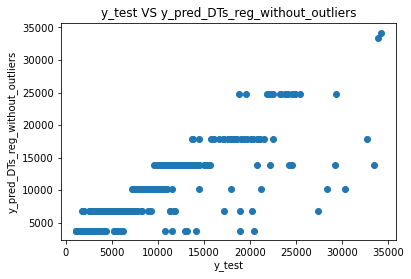

In [203]:
plt.scatter(y_test, y_pred_DTs_reg_without_outliers)
plt.title("y_test VS y_pred_DTs_reg_without_outliers")
plt.ylabel("y_pred_DTs_reg_without_outliers")
plt.xlabel("y_test")

###### After hyperparamet tuning and removing outliers, the accuracy of the DT model decreased to 66.9% on test data.

# 

# Step 14 | RandomForestRegressor

## train test split

In [224]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

## Building model and Evaaluation

In [225]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [226]:
Evaluation(x_train, y_train, random_forest)

mean_absolute_error :  991.9025840167511
mean_squared_error  :  3462961.751884577
root_mean_absolute_error 1860.9034773154078
R2_score            :  0.9750860116584423


In [227]:
Evaluation(x_test, y_test, random_forest)

mean_absolute_error :  2701.2297606595334
mean_squared_error  :  23856087.631188292
root_mean_absolute_error 4884.269406081967
R2_score            :  0.8543224679281128


## Improving model and Evaluation

In [208]:
n_estimators = (100,200)
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
max_depth = range(3,21)
random_state =range(1,8)

params = {"max_depth":max_depth, "random_state":random_state, "n_estimators":n_estimators}

RF_grid = GridSearchCV(random_forest, param_grid=params,
                         scoring = "neg_mean_squared_error",
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)

RF_grid.fit(x_train, y_train)


print('best parameters:',RF_grid.best_params_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
best parameters: {'max_depth': 4, 'n_estimators': 200, 'random_state': 5}


In [273]:
# using squared_error as criterion

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="squared_error", random_state=5)
random_forest.fit(x_train, y_train)
evaliuation(x_test, y_test, random_forest)

mean_absolute_error :  2773.1170499248683
mean_squared_error  :  22578814.11701985
root_mean_absolute_error 4751.716965163208
R2_score            :  0.8621221564688938


In [274]:
# using squared_error as friedman_mse

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="friedman_mse", random_state=5)
random_forest.fit(x_train, y_train)
evaliuation(x_test, y_test, random_forest)

mean_absolute_error :  2776.5103421688373
mean_squared_error  :  22600032.15314135
root_mean_absolute_error 4753.94911133274
R2_score            :  0.8619925882351843


In [275]:
# using squared_error as absolute_error

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="absolute_error", random_state=5)
random_forest.fit(x_train, y_train)
evaliuation(x_test, y_test, random_forest)

mean_absolute_error :  2245.987463809889
mean_squared_error  :  24203015.390440922
root_mean_absolute_error 4919.656023589548
R2_score            :  0.8522039487242733


In [276]:
# using squared_error as poisson

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="poisson", random_state=5)
random_forest.fit(x_train, y_train)
evaliuation(x_test, y_test, random_forest)

mean_absolute_error :  7804.519954032172
mean_squared_error  :  109051984.17906411
root_mean_absolute_error 10442.795802804156
R2_score            :  0.3340725366057342


###### As you can see, the model with "squared_error" as criterion has the highest score on test data.

In [280]:
# using squared_error as criterion

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="squared_error", random_state=5)
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=200, random_state=5)

In [281]:
Evaluation(x_train, y_train, random_forest)

mean_absolute_error :  2336.3760000840357
mean_squared_error  :  17142674.00605144
root_mean_absolute_error 4140.371240124663
R2_score            :  0.8766684673610784


In [282]:
Evaluation(x_test, y_test, random_forest)

mean_absolute_error :  2773.1170499248683
mean_squared_error  :  22578814.11701985
root_mean_absolute_error 4751.716965163208
R2_score            :  0.8621221564688938


In [283]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(random_forest, x, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.89163091 0.86463758 0.8403889  0.75849793 0.86308573 0.92149249
 0.87518048 0.81357088 0.86838119 0.85871608]
mean of all scores is :  0.8555582181242155


In [284]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(random_forest, x_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.89687892 0.84275166 0.74176052 0.84127079 0.80742988 0.86676849
 0.84637669 0.89022168 0.86963482 0.87129541]
mean of all scores is :  0.8474388849003193


In [285]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(random_forest, x_test, y_test, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.86594365 0.94193045 0.81846761 0.70001297 0.79523059 0.92611111
 0.84351484 0.73122247 0.88646456 0.88709639]
mean of all scores is :  0.8395994631896077


## Predict

In [228]:
y_pred_RF = random_forest.predict(x_test)

In [229]:
random_forest_score = metrics.r2_score(y_test, y_pred_RF)
random_forest_score

0.8543224679281128

## Compare

Text(0.5, 0, 'y_test')

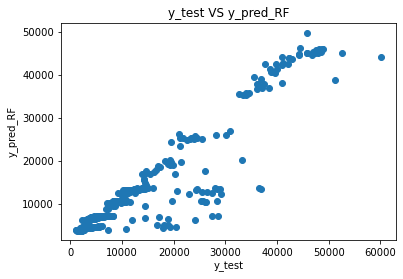

In [288]:
plt.scatter(y_test, y_pred_RF)
plt.title("y_test VS y_pred_RF")
plt.ylabel("y_pred_RF")
plt.xlabel("y_test")

# 

# Step 15 | k-nearest neighbors

Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

## train test split

In [230]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Scaling

In [231]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Finding the bset number of k

In [45]:
def Best_knn(k_neighbors):

    training_accuracy = []
    testing_accuracy = []

    for k in range(1,k_neighbors) : 
        knn_model = KNeighborsRegressor(n_neighbors=k)
        knn_model.fit(x_train_scaled, y_train)
        training_accuracy.append(knn_model.score(x_train_scaled, y_train))
        testing_accuracy.append(knn_model.score(x_test_scaled, y_test)) 
        
    plt.plot(range(1,k_neighbors), training_accuracy, label="training accuracy")
    plt.plot(range(1,k_neighbors), testing_accuracy, label="testing accuracy") 
    plt.ylabel("Accuracy")
    plt.xlabel("numbers of neighbors")
    plt.grid()
    plt.legend()
    plt.show()

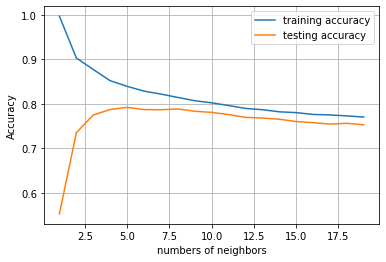

In [46]:
result_of_20_k = Best_knn(20)

## Let's choose 7 as the number of neighbors.

In [232]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

## Evaluation

In [48]:
Evaluation(x_train_scaled, y_train, knn)

mean_absolute_error :  3052.481010282658
mean_squared_error  :  24702263.81064067
root_mean_absolute_error 4970.137202395993
R2_score            :  0.8222816315388235


In [49]:
Evaluation(x_test_scaled, y_test, knn)

mean_absolute_error :  3745.4408365184795
mean_squared_error  :  34869455.50805245
root_mean_absolute_error 5905.0364527285055
R2_score            :  0.7870691832778731


## Predict

In [233]:
y_pred_knn = knn.predict(x_test_scaled)

In [234]:
knn_score = metrics.r2_score(y_test, y_pred_knn)
knn_score

0.7870691832778731

## compare

Text(0.5, 0, 'y_test')

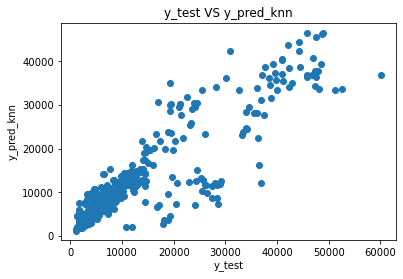

In [93]:
plt.scatter(y_test, y_pred_knn)
plt.title("y_test VS y_pred_knn")
plt.ylabel("y_pred_knn")
plt.xlabel("y_test")

# 

# Step 16 | Comparing

In [256]:
compare_df = pd.DataFrame()

dict = {'linear': linear_score,
                           'poly' : poly_score,
                          'ridge': ridge_score,
                          'lasso': lasso_score,
                          'elastic': elastic_score,
                          'DTs': DTs_score,
                          'DTs_no_outlier': DTs_reg_without_outliers_score,
                          'RF': random_forest_score,
                          'KNN': knn_score}

compare_df.append(dict,ignore_index=True)

,linear,poly,ridge,lasso,elastic,DTs,DTs_no_outlier,RF,KNN
0,0.762868,0.850324,0.850578,0.850362,0.844341,0.838462,0.66919,0.854322,0.787069
